Important imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

Load the data

In [4]:
DATA_PATH = '/content/Social_Network_Ads.csv' # change path if needed


try:
    df = pd.read_csv(DATA_PATH)
except FileNotFoundError:
  raise FileNotFoundError(f"Dataset not found at {DATA_PATH}. Place Social_Network_Ads.csv in the working directory.")

Inspect

In [5]:
print('First 5 rows:')
print(df.head())
print('\nDataset info:')
print(df.info())
print('\nClass distribution:')
print(df['Purchased'].value_counts())

First 5 rows:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Class distribution:
Purchased
0    257
1    143
Name: count, dtype: int64


3. Preprocessing

In [7]:
if 'User ID' in df.columns:
    df = df.drop(columns=['User ID'])

In [8]:
# Encode Gender
if 'Gender' in df.columns:
    le = LabelEncoder()
    df['Gender'] = le.fit_transform(df['Gender']) # Male/Female -> 1/0

In [9]:
# Features and target
feature_cols = [c for c in df.columns if c != 'Purchased']
X = df[feature_cols].values
y = df['Purchased'].values

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
# Scale numeric columns (Age, EstimatedSalary). We will scale all numeric columns in X.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. Model training: Decision Tree

In [12]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

5. Evaluation

In [13]:
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {acc:.4f}")
print('\nClassification report:')
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:')
print(cm)


Test accuracy: 0.8900

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.80      0.92      0.86        36

    accuracy                           0.89       100
   macro avg       0.88      0.90      0.88       100
weighted avg       0.90      0.89      0.89       100


Confusion matrix:
[[56  8]
 [ 3 33]]


6. Visualizations

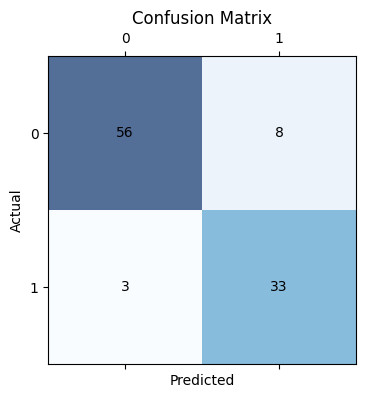

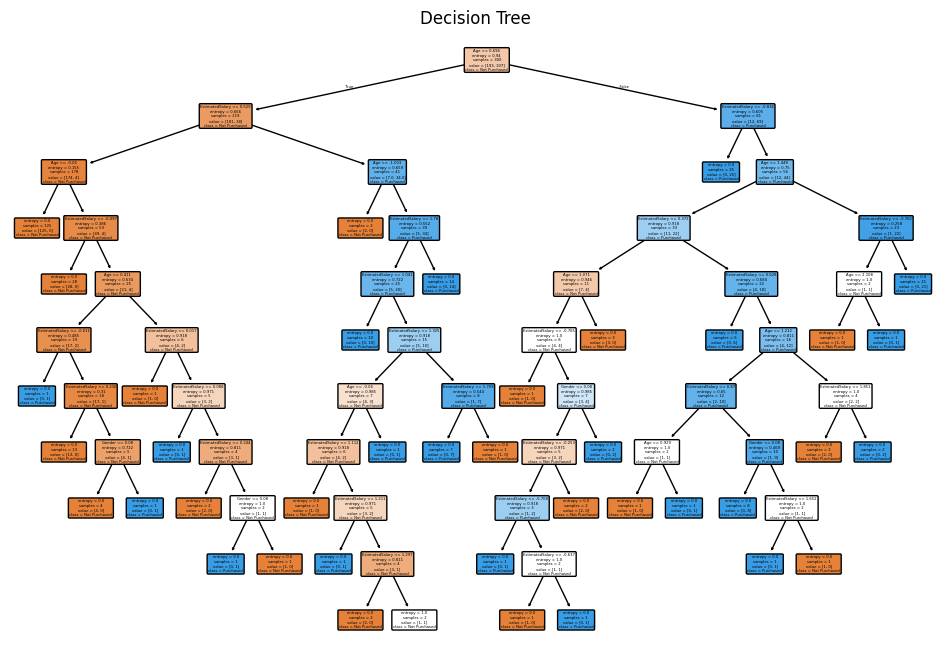

In [14]:
# Confusion matrix plot
fig, ax = plt.subplots(figsize=(5,4))
ax.matshow(cm, cmap='Blues', alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, str(cm[i, j]), va='center', ha='center')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()


# Plot the decision tree (may be large for deep trees)
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=feature_cols, class_names=['Not Purchased','Purchased'], filled=True, rounded=True)
plt.title('Decision Tree')
plt.show()

